In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("datos1.csv", header = None)

In [34]:
df.head()

,0,1,2,3,4
0,1,1,1,1,3
1,1,1,1,2,2
2,1,1,2,1,3
3,1,1,2,2,1
4,1,2,1,1,3


In [ ]:
class Perceptron:

    def __init__(self, tasa, num_iter):
        self.tasa = tasa
        self.num_iter = num_iter

    def entrenar(self, entradas, salida_deseada):
        self.pesos = np.zeros(1 + entradas.shape[1])
        self.errores_vec = []

        for i in range(self.num_iter):
            errores = 0
            for xi, target in zip(entradas, salida_deseada):
                nuevo_peso = self.tasa * (target - self.predecir(xi))
                self.pesos[1:] += nuevo_peso * xi
                self.pesos[0] += nuevo_peso

                errores += int(nuevo_peso != 0.0)
            self. errores_vec.append(errores)
        return self
    
    def predecir(self, entradas):
        func = np.where(self.net_entradas(entradas) >= 0.0, 1, -1)
        return func
    
    def net_entradas(self, entradas):
        func_activ = np.dot(entradas, self.pesos[1:]) + self.pesos[0]
        return func_activ

In [37]:
df[4].value_counts()

3    15
2     5
1     4
Name: 4, dtype: int64

In [67]:

entradas = df.iloc[0:10, [2, 3]].values
 

y = df.iloc[0:10, 4].values
y = np.where( y == 3, -1, 1 )
  
ptn = Perceptron(tasa = 0.1, num_iter = 10)
 
ptn.entrenar(entradas, y)

In [68]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
      
  
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
        
        Z = classifier.predecir(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.8, c=cmap(idx),
                        edgecolor='black',
                        marker=markers[idx], 
                        label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


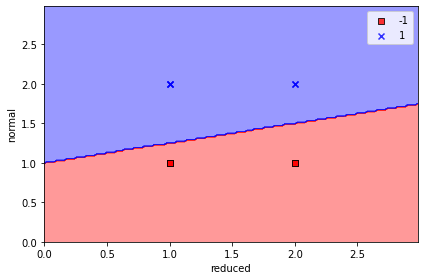

In [69]:
ptn = plot_decision_regions(X=entradas, y=y, classifier=ptn)
plt.xlabel('reduced')
plt.ylabel('normal')
plt.legend(loc='upper right')
 
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap